In [1]:
from scipy import *
from numpy import *
from matplotlib.pyplot import *
from scipy.linalg import *
from numpy.linalg import *
from scipy.optimize import root_scalar
import scipy.special as special
import FNC

In [2]:
# This (optional) block is for improving the display of plots.
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("svg","pdf")
rcParams["figure.figsize"] = [7,4]
rcParams["lines.linewidth"] = 2
rcParams["lines.markersize"] = 4
rcParams['animation.html'] = "jshtml"  # or try "html5"

 # Example 4.1.1

 In the theory of vibrations of a circular drum, the displacement of the drumhead can be expressed in terms of pure harmonic modes,

 $$J_m(\omega_{k,m} r) \cos(m\theta) \cos(c \omega_{k,m} t),$$

 where $(r,\theta)$ are polar coordinates, $0\le r\le 1$, $t$ is time, $m$ is a positive integer, $c$ is a material parameter, and $J_m$ is a _Bessel function of the first kind_. The quantity $\omega_{k,m}$ is a resonant frequency and is a positive root of the equation

 $$J_m(\omega_{k,m}) = 0,$$

 which states that the drumhead is clamped around the rim. Tabulating approximations to the zeros of Bessel functions has occupied countless mathematician-hours throughout the centuries.

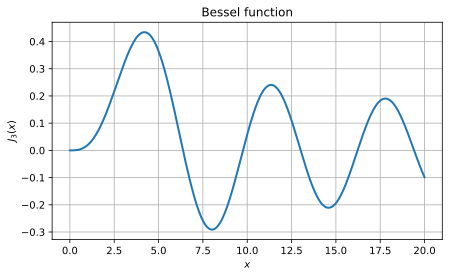

In [3]:
def J3(x):
    return special.jv(3.0,x)
xx = linspace(0,20,500)
fig,ax = subplots()
ax.plot(xx,J3(xx))
ax.grid()
xlabel("$x$")
ylabel("$J_3(x)$")
title("Bessel function");

 From the graph we see roots near 6, 10, 13, 16, and 19. We use `root_scalar` from the `scipy.optimize` package to find these roots accurately.

In [4]:
omega = []
for guess in [6.,10.,13.,16.,19.]:
    s = root_scalar(J3,bracket=[guess-.5,guess+.5]).root
    omega.append(s)

print(omega)

[6.380161895923984, 9.761023129981195, 13.015200721698434, 16.223466160318758, 19.40941522643501]


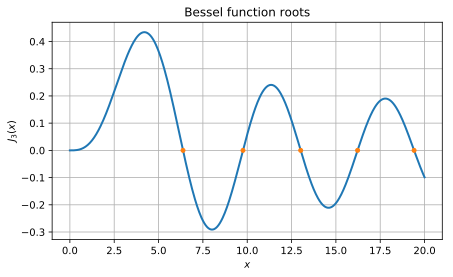

In [5]:
ax.plot(omega,J3(omega),"o")
ax.set_title("Bessel function roots")
fig

 # Example 4.1.2

 Consider first the function

In [6]:
f = lambda x: (x-1)*(x-2)

 At the root $r=1$, we have $f'(r)=-1$. If the values of $f$ were perturbed at any point by noise of size, say, $0.05$, we can imagine finding the root of the function as though drawn with a thick line, whose edges we show here.

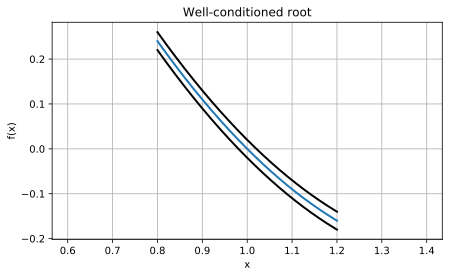

In [7]:
xx = linspace(0.8,1.2,400)

plot(xx,f(xx))
plot(xx,f(xx)+0.02,"k")
plot(xx,f(xx)-0.02,"k")
axis("equal"); grid(True);
xlabel("x");  ylabel("f(x)");
title("Well-conditioned root");

 The possible values for a perturbed root all lie within the interval where the black lines intersect the $x$ axis. The width of that zone is about the same as the vertical distance between the lines.

 By contrast, consider the function

In [8]:
f  = lambda x: (x-1)*(x-1.01)

 Now $f'(1)=-0.01$, and the graph of $f$ will be much shallower near $x=1$. Look at the effect this has on our thick rendering:

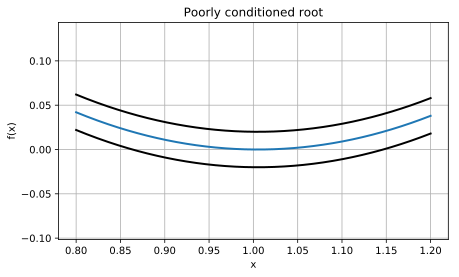

In [9]:
plot(xx,f(xx))
plot(xx,f(xx)+0.02,"k")
plot(xx,f(xx)-0.02,"k")
axis("equal"); grid(True);
xlabel("x");  ylabel("f(x)");
title("Poorly conditioned root");

The vertical displacements in this picture are exactly the same as before. But the potential _horizontal_ displacement of the root is much wider. In fact, if we perturb the function upward by the amount drawn here, the root disappears entirely!

 # Example 4.2.1

 Let's convert the roots of a quadratic polynomial $f(x)$ to a fixed point problem.

In [10]:
f = poly1d([1,-4,3.5])
r = f.roots
print(r)

[2.70710678 1.29289322]


 We'll define $g(x)=x-f(x)$. Intersections of its graph with the line $y=x$ are fixed points of $g$ and thus roots of $f$. (Only one is shown in the chosen plot range.)

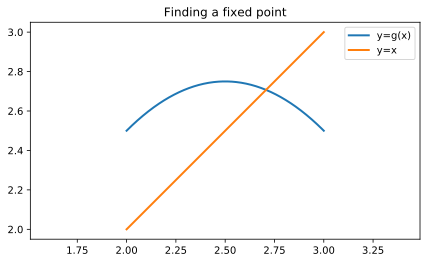

In [11]:
fig,ax = subplots();
g = lambda x: x - f(x)
xx = linspace(2,3,400)
ax.plot(xx,g(xx),label="y=g(x)")
ax.plot(xx,xx,label="y=x")
axis("equal");  legend();
title("Finding a fixed point");

 If we evalaute $g(2.1)$, we get a value of almost 2.6.

In [12]:
x = 2.1;  y = g(x)
print(y)

2.59


 So $g(x)$ is considerably closer to a fixed point than $x$ was. The value $y=g(x)$ ought to become our new $x$ value! Changing the $x$ coordinate in this way is the same as following a horizontal line over to the graph of $y=x$.

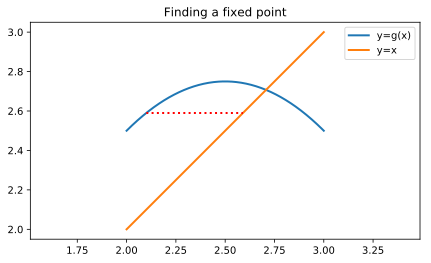

In [13]:
ax.plot([x,y],[y,y],"r:",label="")
fig

 Now we can compute a new value for $y$. We leave $x$ alone here, so we travel along a vertical line to the graph of $g$.

y: 2.7419000000000002


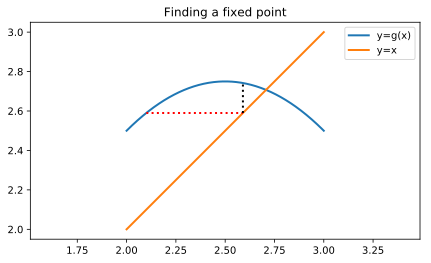

In [14]:
x = y;  y = g(x)
print("y:",y)
ax.plot([x,x],[x,y],"k:")
fig

 You see that we are in a position to repeat these steps as often as we like. Let's apply them a few times and see the result.

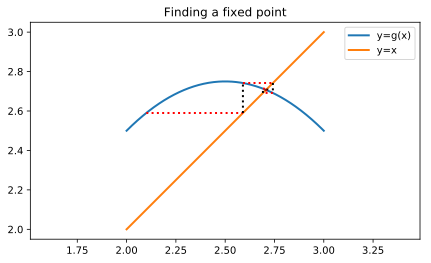

In [15]:
for k in range(5):
    ax.plot([x,y],[y,y],"r:");  x = y;    # y --> new x
    y = g(x);  ax.plot([x,x],[x,y],"k:")  # g(x) --> new y
fig

 The process spirals in beautifully toward the fixed point we seek. Our last estimate has almost 4 accurate digits.

In [16]:
abs(y-max(r))/max(r)

0.0001653094344995643

 Now let's try to find the other fixed point $\approx 1.29$ in the same way. We'll use 1.3 as a starting approximation.

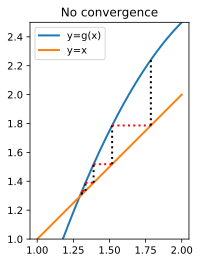

In [17]:
xx = linspace(1,2,400)
fig,ax = subplots()
ax.plot(xx,g(xx),label="y=g(x)")
ax.plot(xx,xx,label="y=x")
ax.set_aspect(1.0)
ax.legend()

x = 1.3; y = g(x)
for k in range(5):
    ax.plot([x,y],[y,y],"r:");  x = y;    # y --> new x
    y = g(x);  ax.plot([x,x],[x,y],"k:")  # g(x) --> new y
ylim(1,2.5)
title("No convergence");

 This time, the iteration is pushing us _away_ from the correct answer.

 # Example 4.2.3

In [18]:
f = poly1d([1,-4,3.5])
r = f.roots
print(r)

[2.70710678 1.29289322]


 Here is the fixed point iteration. This time we keep track of the whole sequence of approximations.

In [19]:
g = lambda x: x - f(x)
x = zeros(12)
x[0] = 2.1; 
for k in range(11):
    x[k+1] = g(x[k])

print(x)

[2.1        2.59       2.7419     2.69148439 2.71333373 2.70448872
 2.70818436 2.70665927 2.70729195 2.70703005 2.70713856 2.70709362]


 It's easiest to construct and plot the sequence of errors.

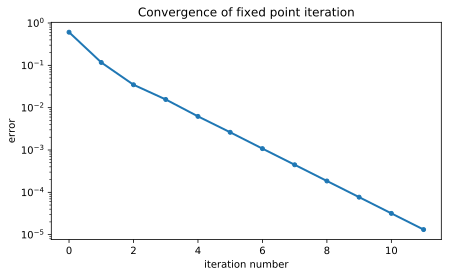

In [20]:
err = abs(x-max(r))
semilogy(err,"-o")
xlabel("iteration number")
ylabel("error")
title("Convergence of fixed point iteration");

 It's quite clear that the convergence quickly settles into a linear rate. We could estimate this rate by doing a least-squares fit to a straight line. Keep in mind that the values for small $k$ should be left out of the computation, as they don't represent the linear trend.

In [21]:
p = polyfit(arange(5,13),log(err[4:]),1)
print(p)

[-0.88071816 -0.66805739]


 We can exponentiate the slope to get the convergence constant $\sigma$.

In [22]:
print("sigma:",exp(p[0]))

sigma: 0.4144851385485472


 The numerical values of the error should decrease by a factor of $\sigma$ at each iteration. We can check this easily with an elementwise division.

In [23]:
err[8:] / err[7:-1]

array([0.41376605, 0.41439873, 0.41413683, 0.41424534])

 # Example 4.3.1

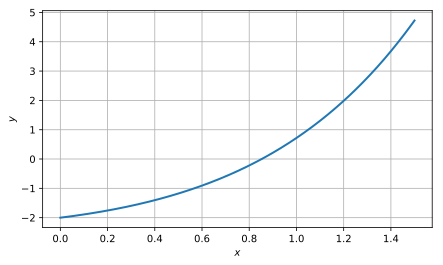

In [24]:
f = lambda x: x*exp(x) - 2
xx = linspace(0,1.5,400)

fig,ax = subplots()
ax.plot(xx,f(xx),label="function") 
ax.grid()
ax.set_xlabel("$x$");
ax.set_ylabel("$y$");

From the graph, it is clear that there is a root near $x=1$. So we call that our initial guess, $x_1$.

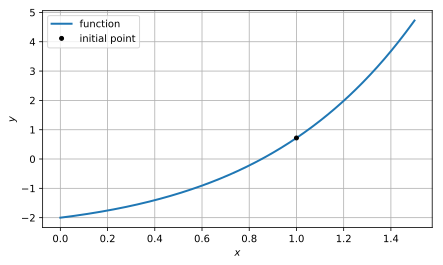

In [25]:
x1 = 1
f1 = f(x1)
ax.plot(x1,f1,"ko",label="initial point")
ax.legend()
fig

Next, we can compute the tangent line at the point $\bigl(x_1,f(x_1)\bigr)$, using the derivative.

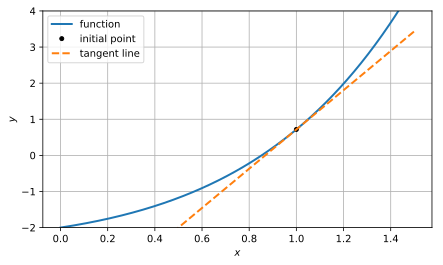

In [26]:
dfdx = lambda x: exp(x)*(x+1)
slope1 = dfdx(x1)
tangent1 = lambda x: f1 + slope1*(x-x1)

ax.plot(xx,tangent1(xx),"--",label="tangent line")
ax.set_ylim(-2,4);
ax.legend()
fig

In lieu of finding the root of $f$ itself, we settle for finding the root of the tangent line approximation, which is trivial. Call this $x_2$, our next approximation to the root.

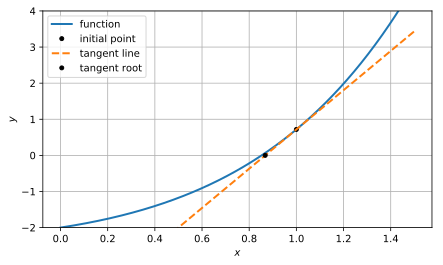

In [27]:
x2 = x1 - f1/slope1
ax.plot(x2,0,"ko",label="tangent root")
ax.legend()
fig

In [28]:
f2 = f(x2)
print(f2)

0.06716266657572145


The residual (value of $f$) is smaller than before, but not zero. So we repeat the process with a new tangent line based on the latest point on the curve.

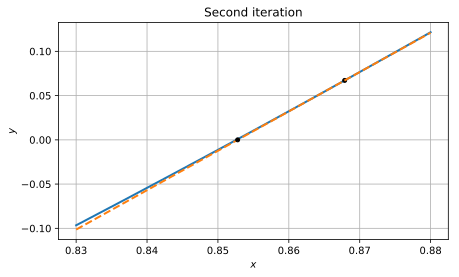

In [29]:
xx = linspace(.83,.88,200)

plot(xx,f(xx))
plot(x2,f2,"ko")
grid()
xlabel("$x$");
ylabel("$y$");

slope2 = dfdx(x2)
tangent2 = lambda x: f2 + slope2*(x-x2)
plot(xx,tangent2(xx),"--")
x3 = x2 - f2/slope2
plot(x3,0,"ko")
title("Second iteration");

In [30]:
f3 = f(x3)
print(f3)

0.0007730906446230534


We appear to be getting closer to the true root each time. 

# Example 4.3.2

In [31]:
f = lambda x: x*exp(x) - 2
dfdx = lambda x: exp(x)*(x+1)

We don't know the exact root, so we use `root_scalar` to determine the "true" value.

In [32]:
r = root_scalar(f,bracket=[0.8,1.0]).root
print(r)

0.8526055020137255


We use $x_1=1$ as a starting guess and apply the iteration in a loop, storing the sequence of iterates in a vector.

In [33]:
x = ones(7)
for k in range(6):
    x[k+1] = x[k] - f(x[k]) / dfdx(x[k])

print(x)

[1.         0.86787944 0.85278337 0.85260553 0.8526055  0.8526055
 0.8526055 ]


Here is the sequence of errors. 

In [34]:
err = x - r
print(err)

[ 1.47394498e-01  1.52739392e-02  1.77871403e-04  2.43551965e-08
  4.44089210e-16 -1.11022302e-16 -1.11022302e-16]


Glancing at the exponents of the errors, they roughly form a neat doubling sequence until the error is comparable to machine precision. We can see this more precisely by taking logs.

In [35]:
print(log(abs(err)))

[ -1.91464263  -4.18160723  -8.63444973 -17.5305206  -35.35050621
 -36.73680057 -36.73680057]


Quadratic convergence isn't as graphically distinctive as linear convergence.

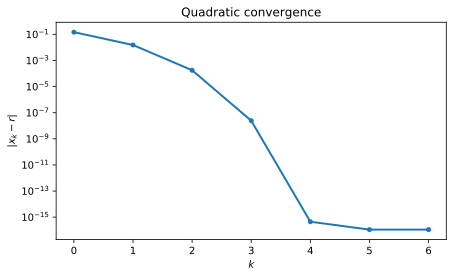

In [36]:
semilogy(range(7),abs(err),"o-")
xlabel("$k$")
ylabel("$|x_k-r|$")
title("Quadratic convergence");

# Example 4.3.3

Suppose we want to solve $e^x=x+c$ for multiple values of $c$. We can create functions for $f$ and $f'$ in each case.

In [37]:
for c in [2,4,7.5,11]:
    f = lambda x: exp(x) - x - c
    dfdx = lambda x: exp(x) - 1
    x = FNC.newton(f,dfdx,1.0)
    r = x[-1]
    print(f"root with c = {c} is {r}")

root with c = 2 is 1.1461932206205836
root with c = 4 is 1.7490313860127016
root with c = 7.5 is 2.2803781488230648
root with c = 11 is 2.610868638149876


There's a subtlety about the definition of `f`. It uses whatever value is assigned to `c` at the moment `f` is called. (This is unlike MATLAB, which locks in the value defined for `c` at the moment of definition.) If we later change the value assigned to `c`, the function is changed also.

In [38]:
c = 11;  f = lambda x: exp(x) - x - c
print(f(0))

-10.0


In [39]:
c = 100; 
print(f(0))

-99.0


# Example 4.4.1

We return to finding a root of the equation $xe^x=2$.

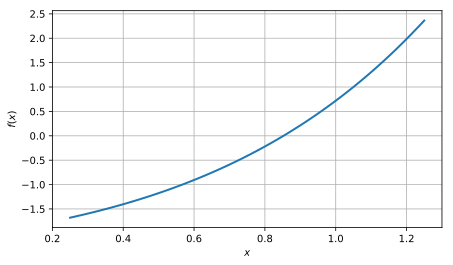

In [40]:
f = lambda x: x*exp(x) - 2
xx = linspace(0.25,1.25,400)

fig,ax = subplots()
ax.plot(xx,f(xx),label="function")
ax.set_xlabel("$x$")
ax.set_ylabel("$f(x)$")
ax.grid();

From the graph, it's clear that there is a root near $x=1$. To be more precise, there is a root in the interval $[0.5,1]$. So let us take the endpoints of that interval as _two_ initial approximations. 

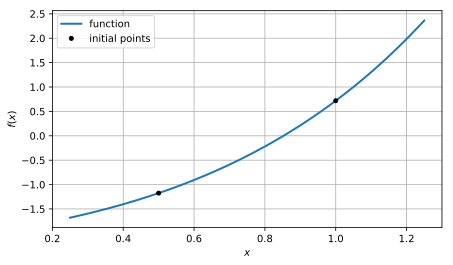

In [41]:
x1 = 1;    f1 = f(x1)
x2 = 0.5;  f2 = f(x2)
ax.plot([x1,x2],[f1,f2],"ko",label="initial points")
ax.legend(); fig

Instead of constructing the tangent line by evaluating the derivative, we can construct a linear model function by drawing the line between the two points $\bigl(x_1,f(x_1)\bigr)$ and $\bigl(x_2,f(x_2)\bigr)$. This is called a _secant line_.

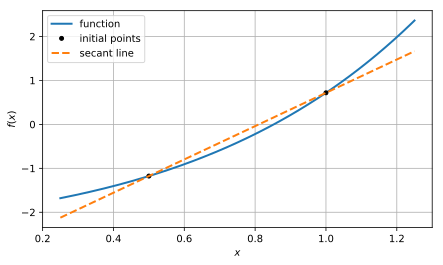

In [42]:
slope2 = (f2-f1) / (x2-x1)
secant2 = lambda x: f2 + slope2*(x-x2)
ax.plot(xx,secant2(xx),"--",label="secant line")
ax.legend(); fig

As before, the next value in the iteration is the root of this linear model. 

-0.17768144843679456


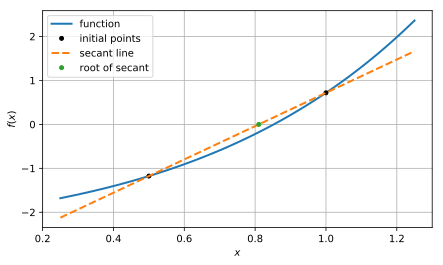

In [43]:
x3 = x2 - f2/slope2
ax.plot(x3,0,"o",label="root of secant")
f3 = f(x3)
print(f3)
ax.legend(); fig

For the next linear model, we use the line through the two most recent points. The next iterate is the root of that secant line, and so on.

In [44]:
slope3 = (f3-f2) / (x3-x2)
x4 = x3 - f3/slope3
print(f(x4))

0.05718067370113333


# Example 4.4.2

We check the convergence of the secant method from the previous example.

In [45]:
f = lambda x: x*exp(x) - 2
x = FNC.secant(f,1,0.5)
print(x)

[1.         0.5        0.81037177 0.86563193 0.85217802 0.85260123
 0.8526055  0.8526055  0.8526055 ]


We don't know the exact root, so we use `root_scalar` to get a substitute.

In [46]:
r = root_scalar(f,bracket=[0.5,1]).root
print(r)

0.8526055020137254


Here is the sequence of errors. 

In [47]:
err = r - x
print(err)

[-1.47394498e-01  3.52605502e-01  4.22337271e-02 -1.30264253e-02
  4.27479941e-04  4.26991559e-06 -1.40547707e-09  4.55191440e-15
  0.00000000e+00]


It's not so easy to see the convergence rate by looking at these numbers. But we can check the ratios of the log of successive errors. 

In [48]:
logerr = log(abs(err))
print(logerr[1:-1] / logerr[:-2])

[0.54443863 3.03580175 1.371694   1.78714693 1.59378048 1.64857867
 1.62014464]


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


It seems to be heading toward a constant ratio of about 1.6 before it bumps up against machine precision.

# Example 4.4.3

Here we look for a root of $x+\cos(10x)$ that is close to 1. 

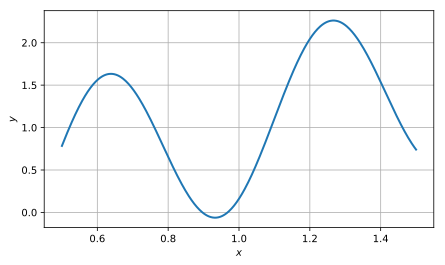

In [49]:
f = lambda x: x + cos(10*x)
xx = linspace(0.5,1.5,400)
fig,ax = subplots()
ax.plot(xx,f(xx),label="function")
ax.grid()
xlabel("$x$"); ylabel("$y$");

In [50]:
r = root_scalar(f,bracket=[0.9,1]).root
print(r)

0.9678884018487659


We choose three values to get the iteration started.

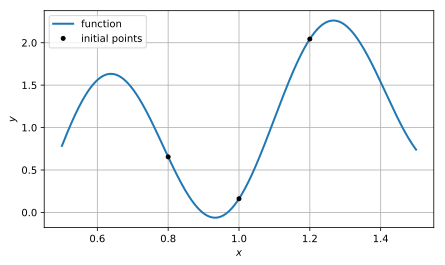

In [51]:
x = array([0.8,1.2,1])
y = f(x)
ax.plot(x,y,"ko",label="initial points")
ax.legend(); fig

If we were using "forward" interpolation, we would ask for the polynomial interpolant of $y$ as a function of $x$. But that parabola has no real roots. 

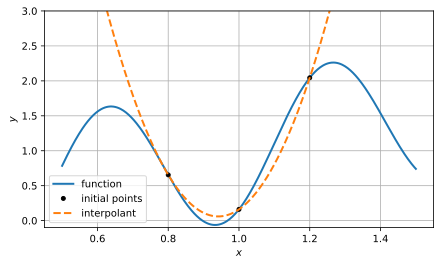

In [52]:
q = poly1d(polyfit(x,y,2))      # interpolating polynomial
ax.plot(xx,q(xx),"--",label="interpolant")
ax.set_ylim(-.1,3)
ax.legend(); fig

To do inverse interpolation, we swap the roles of $x$ and $y$ in the interpolation.

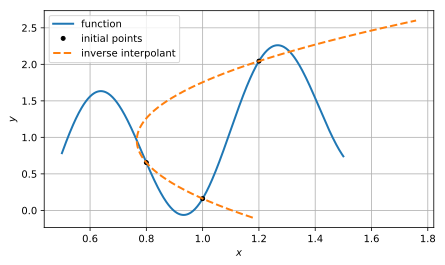

In [53]:
plot(xx,f(xx),label="function")
plot(x,y,"ko",label="initial points")

q = poly1d(polyfit(y,x,2))      # inverse interpolating polynomial
yy = linspace(-.1,2.6,400)
plot(q(yy),yy,"--",label="inverse interpolant")

grid()
xlabel("$x$"); ylabel("$y$");
legend();

We seek the value of $x$ that makes $y$ zero. This means evaluating $q$ at zero. 

In [54]:
x = hstack([x,q(0)])
y = hstack([y,f(x[-1])])
print("x:",x,"\ny:",y)

x: [0.8        1.2        1.         1.10398139] 
y: [0.65449997 2.04385396 0.16092847 1.14820652]


We repeat the process a few more times.

In [55]:
for k in range(5):
    q = poly1d(polyfit(y[-3:],x[-3:],2))
    x = hstack([x,q(0)])
    y = hstack([y,f(x[-1])])

Here is the sequence of errors.

In [56]:
err = x - r
print(err)

[-1.67888402e-01  2.32111598e-01  3.21115982e-02  1.36092984e-01
  1.53473435e-02  3.26831473e-03  4.61743614e-04  6.29584770e-06
  3.43903628e-09]


The error seems to be superlinear, but subquadratic.

In [57]:
logerr = log(abs(err))
print("ratios:",logerr[1:] / logerr[:-1])

ratios: [0.81847754 2.35429709 0.58001887 2.09425263 1.37029859 1.34192828
 1.55922388 1.62731234]


# Example 4.5.2

Let us use Newton's method on the system defined by the function

In [58]:
def nlvalue(x):
    return array([ exp(x[1]-x[0]) - 2,
          x[0]*x[1] + x[2],
          x[1]*x[2] + x[0]**2 - x[1]
    ])

Here is a function that computes the Jacobian matrix.

In [59]:
def nljac(x):
    J = array([
        [-exp(x[1]-x[0]), exp(x[1]-x[0]), 0],
        [x[1], x[0], 1],
        [2*x[0], x[2]-1, x[1]]
    ])
    return J

(These functions could be embedded within a single function in other implementations.) Our initial guess at a root is the origin.

In [60]:
X = zeros([3,7])
Y = copy(X)
x = X[:,0]

We need the value (residual) of the nonlinear function, and its Jacobian, at this value for $\mathbf{x}$. 

In [61]:
Y[:,0] = nlvalue(x)
J = nljac(x)
print("f(x):",Y[:,0])

f(x): [-1.  0.  0.]


We solve for the Newton step and compute the new estimate. 

In [62]:
s = -linalg.solve(J,Y[:,0])
X[:,1] = x+s
print(X[:,:2])

[[ 0. -1.]
 [ 0.  0.]
 [ 0.  0.]]


Here is the new residual.

In [63]:
Y[:,1] = nlvalue(X[:,1])
print("f(x):",Y[:,1])

f(x): [0.71828183 0.         1.        ]


We don't seem to be especially close to a root. Let's iterate a few more times. 

In [64]:
for n in arange(2,7):
    s = -linalg.solve( nljac(X[:,n-1]),Y[:,n-1] )
    X[:,n] = X[:,n-1]+s
    Y[:,n] = nlvalue(X[:,n])

We find the infinity norm of the residuals. 

In [65]:
print("residual norm:",amax(abs(Y),0))   # max in dimension 1

residual norm: [1.00000000e+00 1.00000000e+00 2.02292734e-01 1.02520985e-02
 2.15563843e-05 1.98998845e-10 1.38777878e-17]


We don't know an exact answer, so we will take the last computed value as its surrogate. 

In [66]:
r = X[:,-1]
x = X[:,:-1]

The following will subtract r from every column of x.

In [67]:
e = x - r.reshape([3,1])

Now we take infinity norms and check for quadratic convergence. 

In [68]:
errs = amax(abs(e),0)
print("ratios:",log(errs[1:]) / log(errs[:-1]))

ratios: [0.78450326 3.45386225 2.29641673 2.19672497 2.1506706 ]


For a brief time, we see ratios around 2, but then the limitation of double precision makes it impossible for the doubling to continue. 

# Example 4.5.3

As before, the system is defined by its residual and Jacobian, but this time we implement them as a single function.

In [69]:
def nlsystem(x):
    f = array([
        exp(x[1]-x[0]) - 2,
        x[0]*x[1] + x[2],
        x[1]*x[2] + x[0]**2 - x[1]
        ]) 
    
    J = array([
        [-exp(x[1]-x[0]),exp(x[1]-x[0]), 0],
        [x[1], x[0], 1],
        [2*x[0], x[2]-1, x[1]]
        ]) 
    
    return f,J

Our initial guess is the origin. The output has one column per iteration.

In [70]:
x1 = zeros(3)
x = FNC.newtonsys(nlsystem,x1)
print(x)

[[ 0.00000000e+00 -1.00000000e+00 -5.78586294e-01 -4.63138615e-01
  -4.58026868e-01 -4.58033281e-01 -4.58033281e-01]
 [ 0.00000000e+00 -1.20292797e-16  1.57172588e-01  2.30903685e-01
   2.35120714e-01  2.35113900e-01  2.35113900e-01]
 [ 0.00000000e+00  0.00000000e+00  1.57172588e-01  1.15452497e-01
   1.07713160e-01  1.07689991e-01  1.07689991e-01]]


The last column contains the final Newton estimate. We'll compute the residual there in order to check the quality of the result.

In [71]:
r = x[:,-1]
f,J = nlsystem(r)
print("f:",f)

f: [0. 0. 0.]


Let's use the convergence to the first component of the root as a proxy for the convergence of the vectors.

In [72]:
print("digits:", log10(abs(x[1,:-1]-r[1])) )

digits: [-0.62872169 -0.62872169 -1.10823229 -2.37569574 -5.1666228  -9.96886541]


The exponents approximately double, as is expected of quadratic convergence. 

# Example 4.6.1

To solve a nonlinear system, we need to code only the function defining the system (residual vector), and not its Jacobian.

In [73]:
def nlsystem(x):
    return array([ 
        exp(x[1]-x[0]) - 2,
        x[0]*x[1] + x[2],
        x[1]*x[2] + x[0]**2 - x[1]
        ])

In all other respects usage is the same as for the `newtonsys` function. 

In [74]:
x1 = zeros(3)
x = FNC.levenberg(nlsystem,x1)
print(x.T)

[[ 0.          0.          0.        ]
 [-0.08396947  0.07633588  0.        ]
 [-0.42205076  0.21991261  0.01299757]
 [-0.48610711  0.21389683  0.09771873]
 [-0.45628391  0.24211048  0.1010044 ]
 [-0.45563883  0.23470444  0.10854666]
 [-0.45839615  0.23530957  0.10739828]
 [-0.4580434   0.23512124  0.1076808 ]
 [-0.45803333  0.23511391  0.10768998]
 [-0.45803328  0.2351139   0.10768999]
 [-0.45803328  0.2351139   0.10768999]
 [-0.45803328  0.2351139   0.10768999]]


It's always a good idea to check the accuracy of the root, by measuring the residual (backward error). 

In [75]:
r = x[:,-1]
print("backward error:",norm(nlsystem(r)))

backward error: 1.2707848769787674e-13


Looking at the convergence of the first component, we find a subquadratic convergence rate, just as with the secant method.

In [76]:
print( log10(abs(x[0,:-1]-r[0]) ) )

[ -0.33910297  -0.4270543   -1.44390842  -1.55169836  -2.75711762
  -2.62079477  -3.44025554  -4.99468328  -7.34483365  -8.73659098
 -10.09133087]


# Example 4.7.1

Inhibited enzyme reactions often follow what are known as _Michaelis–Menten_ kinetics, in which a reaction rate $v$ follows a law of the form

$$v(x) = \frac{V x}{K_m + x},$$ 

where $x$ is the concentration of a substrate. The real values $V$ and $K_m$ are parameters that are free to fit to data. For this example we cook up some artificial data with $V=2$ and $K_m=1/2$.

In [77]:
m = 25
x = linspace(0.05,6,m)
y = 2*x/(0.5+x)                      # exactly on the curve
y += 0.15*cos(2*exp(x/16)*x);        # noise added

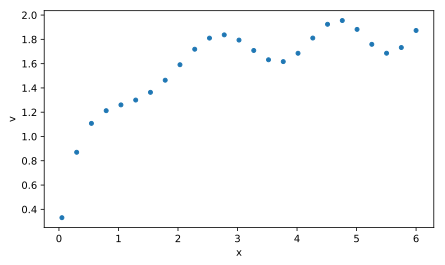

In [78]:
fig,ax = subplots()
ax.plot(x,y,"o",label="data")
xlabel("x");  ylabel("v");

The idea is to pretend that we know nothing of the origins of this data and use nonlinear least squares on the misfit to find the parameters in the theoretical model function $v(x)$. Note in the Jacobian that the derivatives are _not_ with respect to $x$, but with respect to the two parameters, which are contained in the vector `c`.

In [79]:
def misfit(c):
    V,Km = c   # rename components for clarity
    f = V*x/(Km+x) - y
    J = zeros([m,2])
    J[:,0] = x/(Km+x)              # d/d(V)
    J[:,1] = -V*x/(Km+x)**2         # d/d(Km)
    return f,J

In [80]:
c1 = array([1, 0.75])
c = FNC.newtonsys(misfit,c1)
V,Km = c[:,-1]    # final values
print("V:",V,"Km:",Km)
model = lambda x: V*x/(Km+x)

V: 1.96865259837822 Km: 0.4693037307416629


The final values are close to the noise-free values of $V=2$, $K_m=0.5$ that we used to generate the data. We can calculate the amount of misfit at the end, although it's not completely clear what a "good" value would be. Graphically, the model looks reasonable.

In [81]:
print("final misfit norm:",norm(model(x)-y))

final misfit norm: 0.5233998076412236


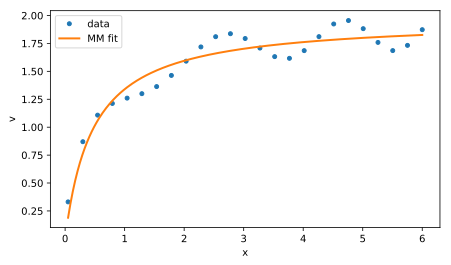

In [82]:
xx = linspace(0.05,6,300)
ax.plot(xx,model(xx),label="MM fit")
ax.legend(); fig

For this model, we also have the option of linearizing the fit process. Rewrite the model as $1/v= (a/x)+b$ for the new parameters $\alpha=K_m/V$ and $\beta=1/V$. This corresponds to the misfit function whose entries are 

$$f_i(\alpha,\beta) = \alpha \cdot \frac{1}{x_i} + \beta - \frac{1}{y_i},$$ 

for $i=1,\ldots,m$. Although the misfit is nonlinear in $x$ and $y$, it's linear in the unknown parameters $\alpha$ and $\beta$, and so can be posed and solved as a linear least-squares problem.

In [83]:
A = [ [1/x[i],1.] for i in range(x.size) ];  u = 1/y;
z =  lstsq(A,u,rcond=None)[0]
alpha,beta = z
print("alpha:",alpha,"beta:",beta)

alpha: 0.12476333709901537 beta: 0.5713959100431234


The two fits are different, because they do not optimize the same quantities. 

In [84]:
linmodel = lambda x: 1 / (beta + alpha/x)
print("final misfit of linearized:",norm(linmodel(x)-y))

final misfit of linearized: 0.7487111013097569


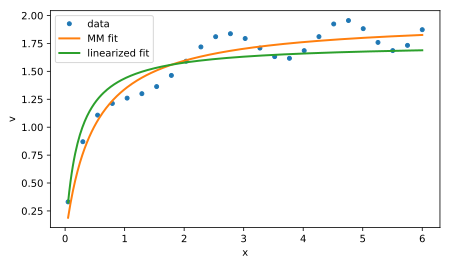

In [85]:
ax.plot(xx,linmodel(xx),label="linearized fit")
ax.legend(); fig